In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, losses, activations, initializers, optimizers, metrics
import credit_data

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
train_data, test_data, train_label, test_label = credit_data.load_data()
print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 67) (6818, 67) (15906, 1) (6818, 1)


C:\Users\Itshony\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Itshony\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.0.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Itshony\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator ColumnTransformer from version 1.0.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Itshony\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using version 0.24.1. This might lead to breaking code or invalid results.

In [3]:
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

#### Classification with keras

In [4]:
import numpy as np

import matplotlib.pyplot as plt

In [5]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model.add(layers.Dense(input_dim=67, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

# model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5)) # Dropout-layer

# output layer 
model.add(layers.Dense(units=3, activation='softmax')) # Apply softmax function on model's output

In [6]:
# "Compile" the model description (Configures the model for training)

model.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

In [8]:
train_data = train_data.todense()
test_data = test_data.todense()

In [9]:
# "Fit" the model on training data

history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3) 

Epoch 1/10
112/112 [==============================] - 3s 17ms/step - loss: 1.2015 - categorical_accuracy: 0.5625 - val_loss: 0.9293 - val_categorical_accuracy: 0.5987
Epoch 2/10
112/112 [==============================] - 1s 13ms/step - loss: 0.9643 - categorical_accuracy: 0.6058 - val_loss: 0.8933 - val_categorical_accuracy: 0.6408
Epoch 3/10
112/112 [==============================] - 2s 14ms/step - loss: 0.8992 - categorical_accuracy: 0.6327 - val_loss: 0.8863 - val_categorical_accuracy: 0.6440
Epoch 4/10
112/112 [==============================] - 2s 13ms/step - loss: 0.8698 - categorical_accuracy: 0.6494 - val_loss: 0.8807 - val_categorical_accuracy: 0.6459
Epoch 5/10
112/112 [==============================] - 2s 14ms/step - loss: 0.8527 - categorical_accuracy: 0.6571 - val_loss: 0.8620 - val_categorical_accuracy: 0.6597
Epoch 6/10
112/112 [==============================] - 1s 12ms/step - loss: 0.8387 - categorical_accuracy: 0.6590 - val_loss: 0.8666 - val_categorical_accuracy: 0.661

In [10]:
# "Evaluate" the model on test data

result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

214/214 [==============================] - 1s 3ms/step - loss: 0.8430 - categorical_accuracy: 0.6676
loss (cross-entropy) : 0.8430036306381226
test accuracy : 0.6676444411277771


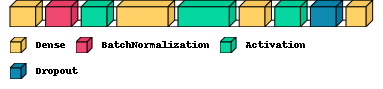

In [11]:
import visualkeras
visualkeras.layered_view(model, legend=True)